In [1]:
import numpy as np
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')


In [2]:
#importing data
data= pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#drop null columns
data.columns[data.isnull().any()]

Index(['waterfront', 'view', 'yr_renovated'], dtype='object')

In [7]:
data = data.drop('waterfront', axis='columns')

In [8]:
data = data.drop('view', axis='columns')

In [9]:
data = data.drop('date', axis='columns')

In [10]:
data = data.drop('zipcode', axis='columns')


In [11]:
data = data.drop('floors', axis='columns')


In [12]:
data = data.drop('long', axis='columns')


In [13]:
data = data.drop('sqft_basement', axis='columns')


In [14]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,3,7,1180,1955,0.0,47.5112,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,3,7,2170,1951,1991.0,47.7210,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,3,6,770,1933,NaN,47.7379,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,5,7,1050,1965,0.0,47.5208,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,3,8,1680,1987,0.0,47.6168,1800,7503


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   17755 non-null  float64
 11  lat            21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.3 MB


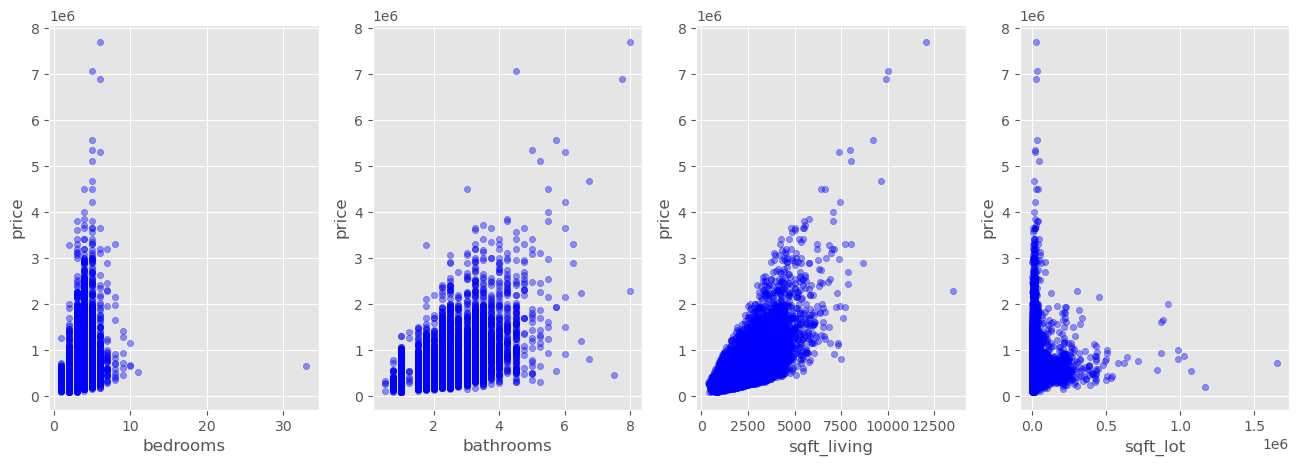

In [16]:
#scatter plot to find the categorical variables
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['bedrooms','bathrooms', 'sqft_living', 'sqft_lot'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


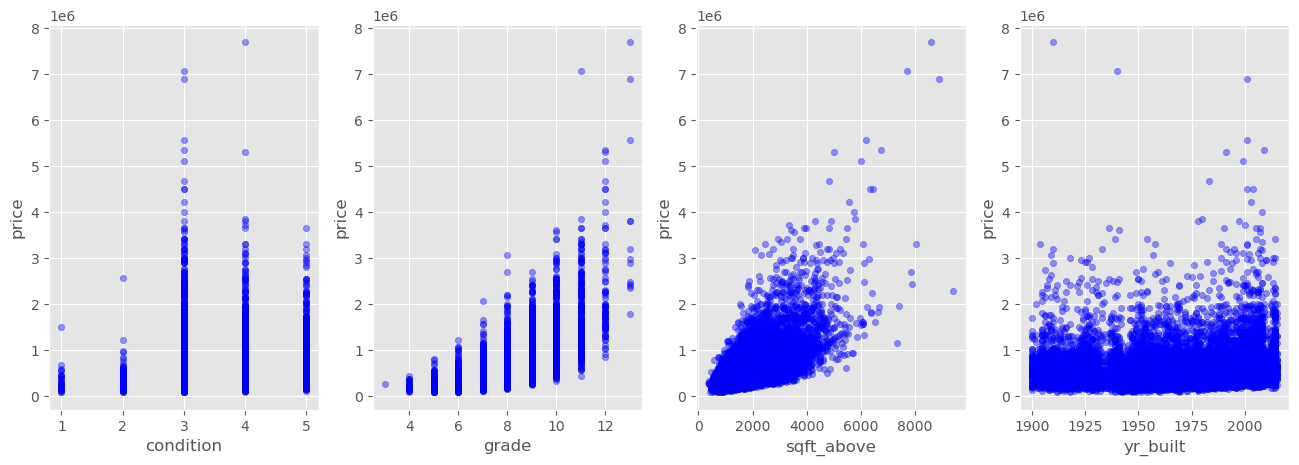

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['condition', 'grade', 'sqft_above','yr_built'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


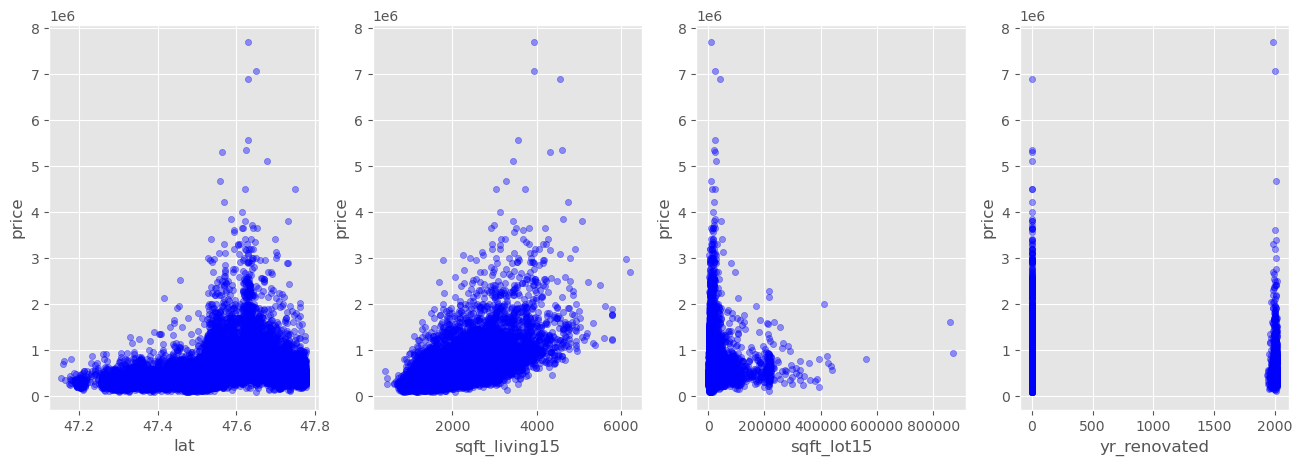

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['lat', 'sqft_living15', 'sqft_lot15', 'yr_renovated'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


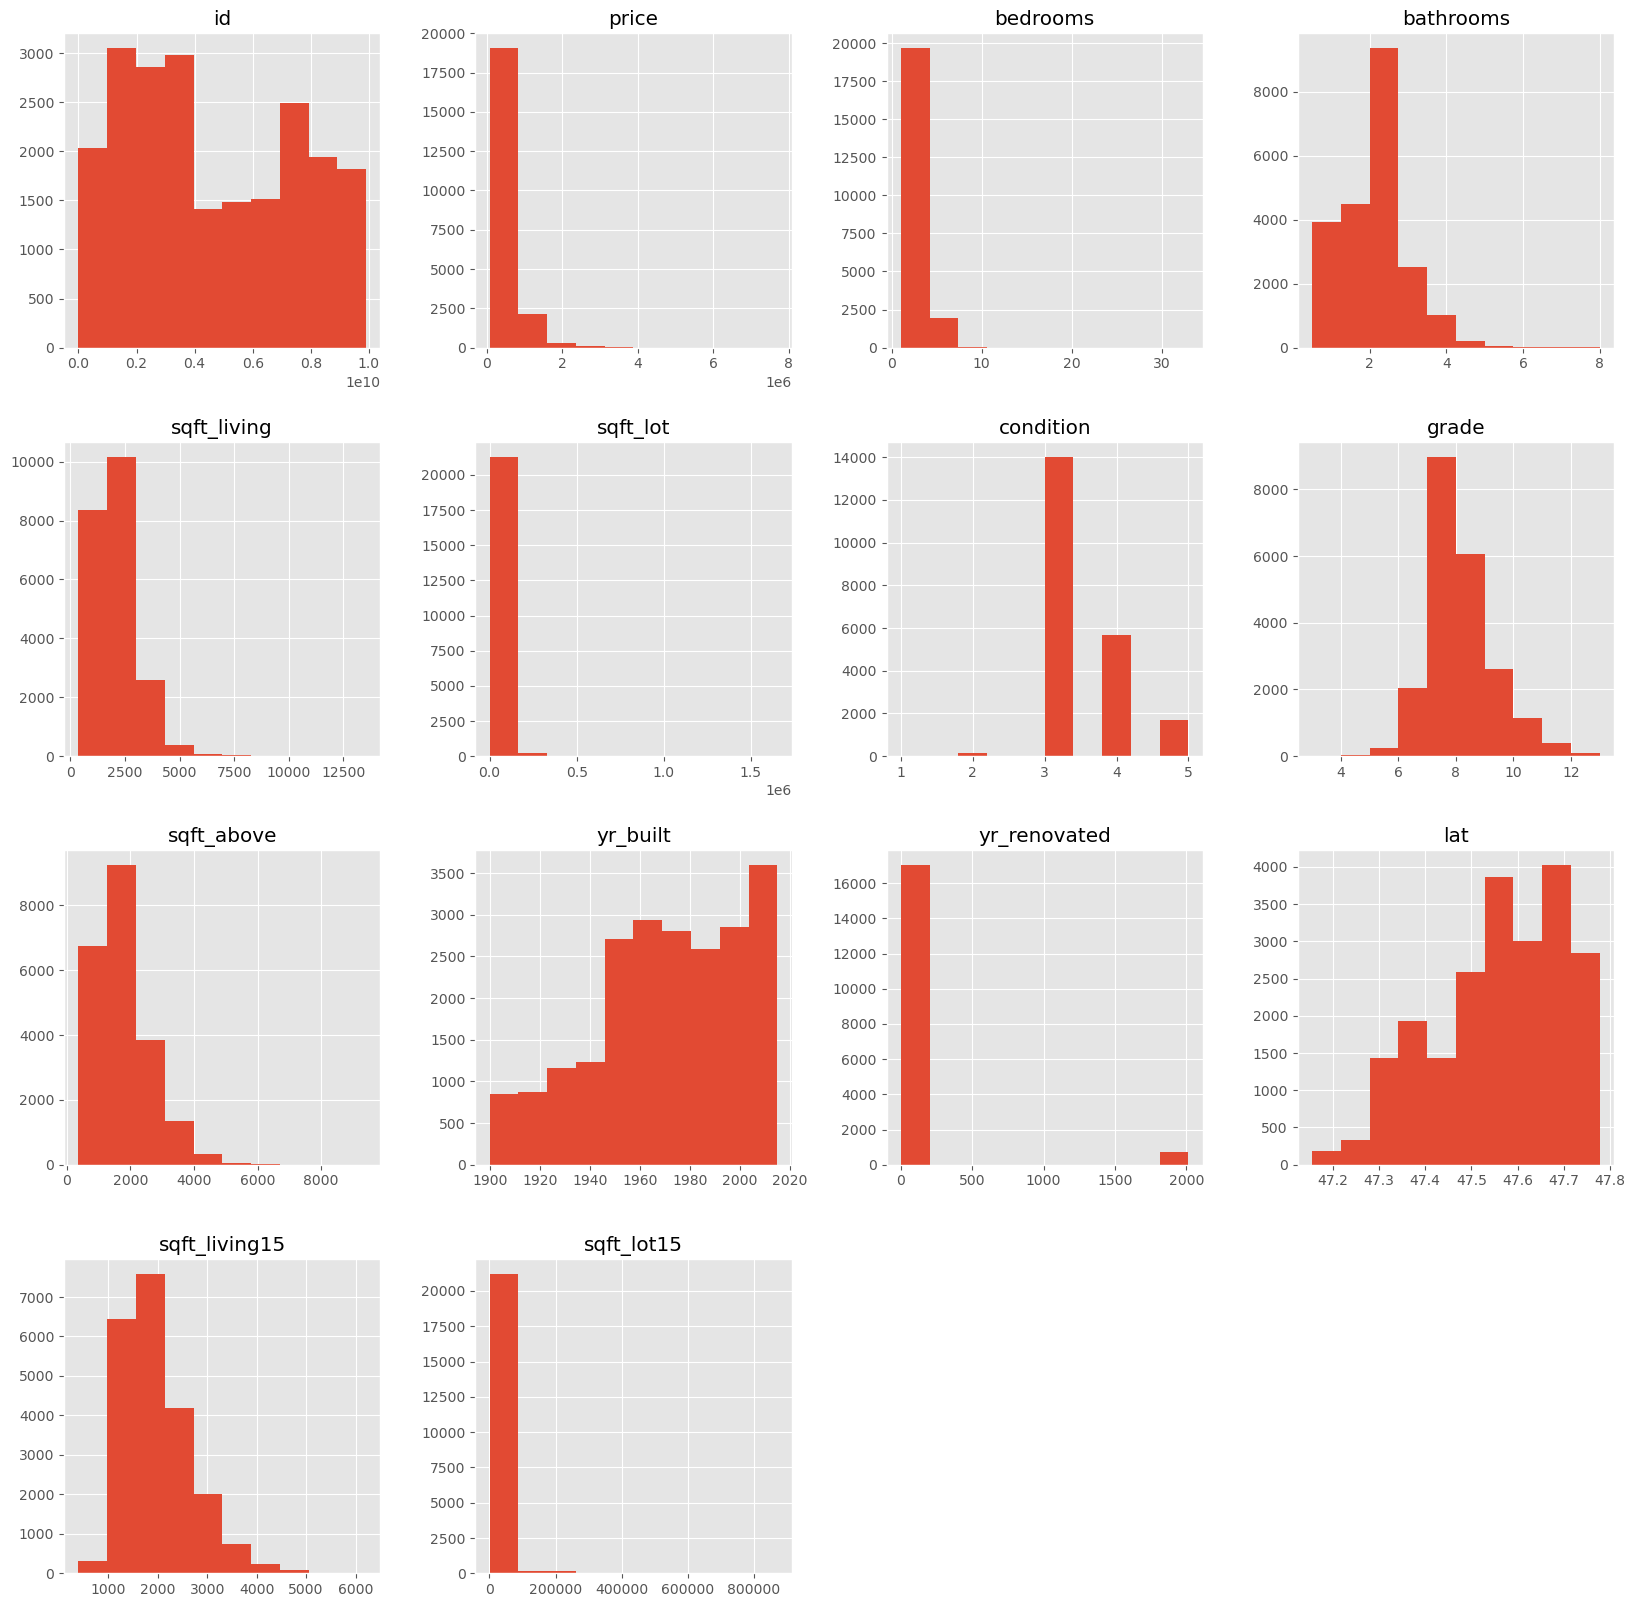

In [19]:
#plot 
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax);

In [20]:
#I create the train-test split, using the sklearn method
x = data[['bedrooms','bathrooms','sqft_living','sqft_above','grade', 'sqft_lot']]#.values
y = data['price']#.values

In [21]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [22]:
#split the test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [23]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(x_train,y_train)

LinearRegression()

In [26]:
#intercept
print(lm.intercept_)

-525735.6474525743


In [27]:
#Coefficient
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-37820.937344
bathrooms,-29198.346767
sqft_living,278.180454
sqft_above,-84.091755
grade,108187.633502
sqft_lot,-0.211203


In [28]:
#predict test
pred = lm.predict(x_test)
pred

array([544870.77524248, 864269.88525647, 473337.2906693 , ...,
       420319.20046595, 481355.26823239, 311266.85538951])

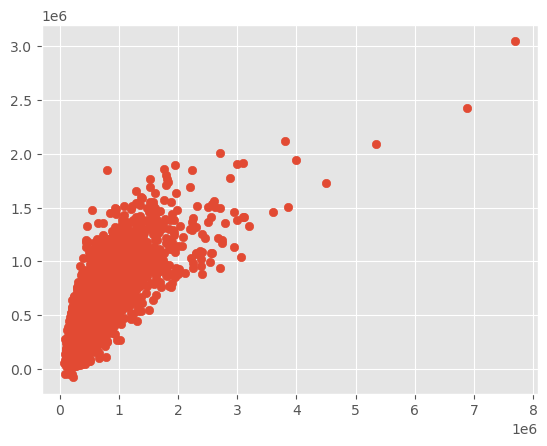

In [29]:
#scatter plot
plt.scatter(y_test,pred)

In [30]:
#import OLS
from statsmodels.formula.api import ols



x_cols = ['sqft_above', 'sqft_living', 'grade', 'sqft_living15',
          'bathrooms', 'bedrooms', 'sqft_lot', 'yr_built','yr_renovated']
predictors = '+'.join(x_cols[:])
formula = 'price' + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     3179.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:18:37   Log-Likelihood:            -2.4428e+05
No. Observations:               17755   AIC:                         4.886e+05
Df Residuals:                   17745   BIC:                         4.887e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.047e+06   1.47e+05     48.015      0.000    6.76e+06    7.33e+06
sqft_above      -11.9284      4.687     -2.545      0.011     -21.115      -2.741
sqft_living     188.1201      5.106     36.844      0.000     178.112     198.128
grade          1.252e+05   2611.119     47.963      0.000     1.2e+05     1.3e+05
sqft_living15    26.1432      4.123      6.341      0.000      18.062      34.225
bathrooms      6.019e+04   3920.041     15.355      0.000    5.25e+04    6.79e+04
bedrooms      -4.898e+04   2331.995    -21.004      0.000   -5.36e+04   -4.44e+04
sqft_lot         -0.2607      0.042     -6.258      0.000      -0.342      -0.179
yr_built      -3981.5555     76.802    -51.842      0.000   -4132.095   -3831.016
yr_renovated     20.6205      4.504      4.579      0.000      11.793      29.448
==============================================================================
Omnibus:                    14742.631   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1166340.507
Skew:                           3.509   Prob(JB):                         0.00
Kurtosis:                      42.081   Cond. No.                     3.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

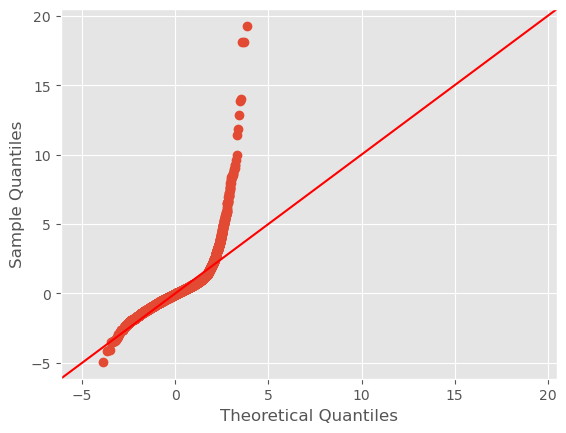

In [31]:
#create the baseline model, using statsmodel
import scipy.stats as stats
import statsmodels as sm
import statsmodels.api as sm


residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

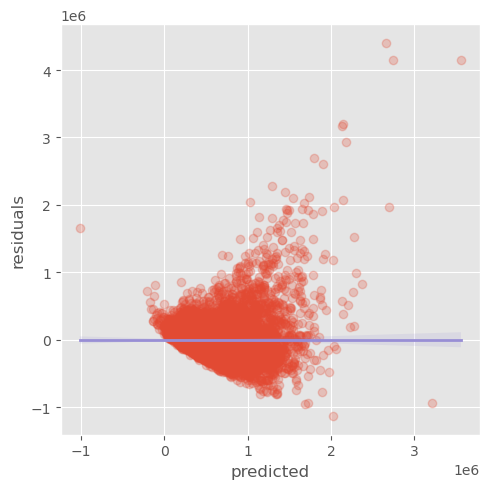

In [32]:
#Homoscedasticity
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(model.fittedvalues,model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()

In [33]:
#chech the number of unique values
data[['bedrooms', 'bathrooms', 'condition','grade', 'yr_built','yr_renovated']].nunique()

bedrooms         12
bathrooms        29
condition         5
grade            11
yr_built        116
yr_renovated     70
dtype: int64

In [34]:
#transforming categorical variables (bedrooms)
data['new_bedrooms'] = np.where(data['bedrooms']>3,'Y','N')
xbd= pd.get_dummies(data.new_bedrooms, prefix='new_bedrooms')
xbd 

,new_bedrooms_N,new_bedrooms_Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
21592,1,0
21593,0,1
21594,1,0
21595,1,0


In [35]:
#transforming categorical variables (bathrooms)
data['new_bathrooms'] = np.where(data['bathrooms']>3,'Y','N')
xbt= pd.get_dummies(data.new_bathrooms, prefix='new_bathrooms')
xbt


,new_bathrooms_N,new_bathrooms_Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,1,0


In [36]:
#transforming categorical variables (yr_built)
data['new_yrbuilt'] = np.where(data['yr_built']>1990,'Y','N')
xyb= pd.get_dummies(data.new_yrbuilt, prefix='new_yrbuilt')
xyb

,new_yrbuilt_N,new_yrbuilt_Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21592,0,1
21593,0,1
21594,0,1
21595,0,1


In [37]:
#transforming categorical variables (yr_renovated)
data['nyr_renovated'] = np.where(data['yr_renovated']>1990,'Y','N')
xrn= pd.get_dummies(data.nyr_renovated, prefix='nyr_renovated')
xrn 

,nyr_renovated_N,nyr_renovated_Y
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,1,0


In [38]:
#change 'bedrooms', bathrooms', 'yr_built and 'yr_renovated' columns over to dummies and drop the first variable
xbd_dummies = pd.get_dummies(data['bedrooms'], prefix='bed', drop_first=True)
xbt_dummies = pd.get_dummies(data['bathrooms'], prefix='bat', drop_first=True)
xyb_dummies = pd.get_dummies(data['yr_built'], prefix='blt', drop_first=True)
xrn_dummies = pd.get_dummies(data['yr_renovated'], prefix='rnv', drop_first=True)

In [39]:
#Remove the original columns from the data and add the dummy columns instead
data = data.drop(['bedrooms','bathrooms','yr_built','yr_renovated'], axis=1)

In [40]:
#Add the new columns
data = pd.concat([data, xbd_dummies, xbt_dummies, xyb_dummies, xrn_dummies], axis=1)
data.head()

,id,price,sqft_living,sqft_lot,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,...,rnv_2006.0,rnv_2007.0,rnv_2008.0,rnv_2009.0,rnv_2010.0,rnv_2011.0,rnv_2012.0,rnv_2013.0,rnv_2014.0,rnv_2015.0
0,7129300520,221900.0,1180,5650,3,7,1180,47.5112,1340,5650,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,2570,7242,3,7,2170,47.7210,1690,7639,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,770,10000,3,6,770,47.7379,2720,8062,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,1960,5000,5,7,1050,47.5208,1360,5000,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,1680,8080,3,8,1680,47.6168,1800,7503,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Database predictor
data_pred = data.iloc[:,1:21]
data_pred.head()

,price,sqft_living,sqft_lot,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,new_bedrooms,new_bathrooms,new_yrbuilt,nyr_renovated,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8
0,221900.0,1180,5650,3,7,1180,47.5112,1340,5650,N,N,N,N,0,1,0,0,0,0,0
1,538000.0,2570,7242,3,7,2170,47.7210,1690,7639,N,N,N,Y,0,1,0,0,0,0,0
2,180000.0,770,10000,3,6,770,47.7379,2720,8062,N,N,N,N,1,0,0,0,0,0,0
3,604000.0,1960,5000,5,7,1050,47.5208,1360,5000,Y,N,N,N,0,0,1,0,0,0,0
4,510000.0,1680,8080,3,8,1680,47.6168,1800,7503,N,N,N,N,0,1,0,0,0,0,0


In [42]:
#correlation
data_pred.corr()

,price,sqft_living,sqft_lot,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8
price,1.000000,0.701917,0.089876,0.036056,0.667951,0.605368,0.306692,0.585241,0.082845,-0.144740,-0.184059,0.177351,0.189927,0.087789,0.046988,0.037731
sqft_living,0.701917,1.000000,0.173453,-0.059445,0.762779,0.876448,0.052155,0.756402,0.184342,-0.350461,-0.273109,0.353324,0.298104,0.148112,0.086606,0.045970
sqft_lot,0.089876,0.173453,1.000000,-0.008830,0.114731,0.184139,-0.085514,0.144763,0.718204,-0.027755,-0.015102,0.026776,0.011408,0.009511,0.005820,-0.003632
condition,0.036056,-0.059445,-0.008830,1.000000,-0.146896,-0.158904,-0.015102,-0.093072,-0.003126,-0.018786,0.007987,-0.003425,0.017081,0.010549,0.002423,0.004853
grade,0.667951,0.762779,0.114731,-0.146896,1.000000,0.756073,0.113575,0.713867,0.120981,-0.256511,-0.144360,0.267428,0.148192,0.040718,0.028252,0.008765
sqft_above,0.605368,0.876448,0.184139,-0.158904,0.756073,1.000000,-0.001199,0.731767,0.195077,-0.315086,-0.225302,0.338496,0.211592,0.096299,0.069572,0.025859
lat,0.306692,0.052155,-0.085514,-0.015102,0.113575,-0.001199,1.000000,0.048679,-0.086139,0.078760,-0.056797,-0.019620,0.028748,0.016570,0.014827,0.012384
sqft_living15,0.585241,0.756402,0.144763,-0.093072,0.713867,0.731767,0.048679,1.000000,0.183515,-0.269725,-0.201539,0.303910,0.188341,0.048384,0.021361,0.009984
sqft_lot15,0.082845,0.184342,0.718204,-0.003126,0.120981,0.195077,-0.086139,0.183515,1.000000,-0.043019,0.001710,0.024296,0.003436,0.008276,0.004700,-0.004861
bed_2,-0.144740,-0.350461,-0.027755,-0.018786,-0.256511,-0.315086,0.078760,-0.269725,-0.043019,1.000000,-0.349663,-0.261774,-0.108311,-0.043230,-0.016070,-0.009394


In [43]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   sqft_living    21597 non-null  int64  
 2   sqft_lot       21597 non-null  int64  
 3   condition      21597 non-null  int64  
 4   grade          21597 non-null  int64  
 5   sqft_above     21597 non-null  int64  
 6   lat            21597 non-null  float64
 7   sqft_living15  21597 non-null  int64  
 8   sqft_lot15     21597 non-null  int64  
 9   new_bedrooms   21597 non-null  object 
 10  new_bathrooms  21597 non-null  object 
 11  new_yrbuilt    21597 non-null  object 
 12  nyr_renovated  21597 non-null  object 
 13  bed_2          21597 non-null  uint8  
 14  bed_3          21597 non-null  uint8  
 15  bed_4          21597 non-null  uint8  
 16  bed_5          21597 non-null  uint8  
 17  bed_6          21597 non-null  uint8  
 18  bed_7 

In [44]:
abs(data_pred.corr()) > 0.75

,price,sqft_living,sqft_lot,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_above,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_living15,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot15,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
bed_2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [45]:
#Checking how much are correlated the variables
data=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data['pairs'] = list(zip(data.level_0, data.level_1))
data.set_index(['pairs'], inplace = True)
data.drop(columns=['level_1', 'level_0'], inplace = True)
data.columns = ['cc']
data.drop_duplicates(inplace=True)
data

,cc
pairs,
"(price, price)",1.000000
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
...,...
"(bed_8, bed_6)",0.002772
"(bed_7, condition)",0.002423
"(sqft_lot15, bed_3)",0.001710


In [46]:
data[(data.cc>.75) & (data.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

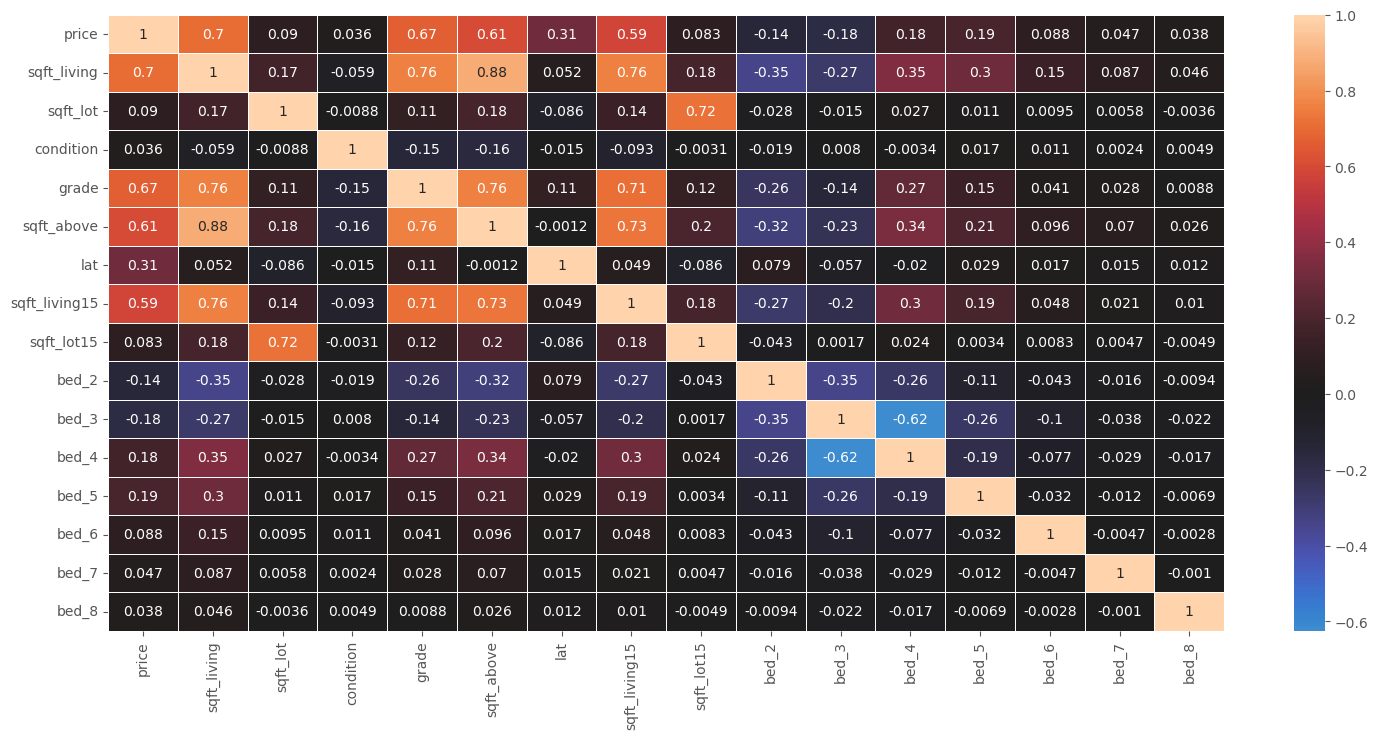

In [47]:
#correlation plot
 fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(data=data_pred.corr(), linewidths=0.5, center=0, annot=True, ax=ax)
sns.heatmap

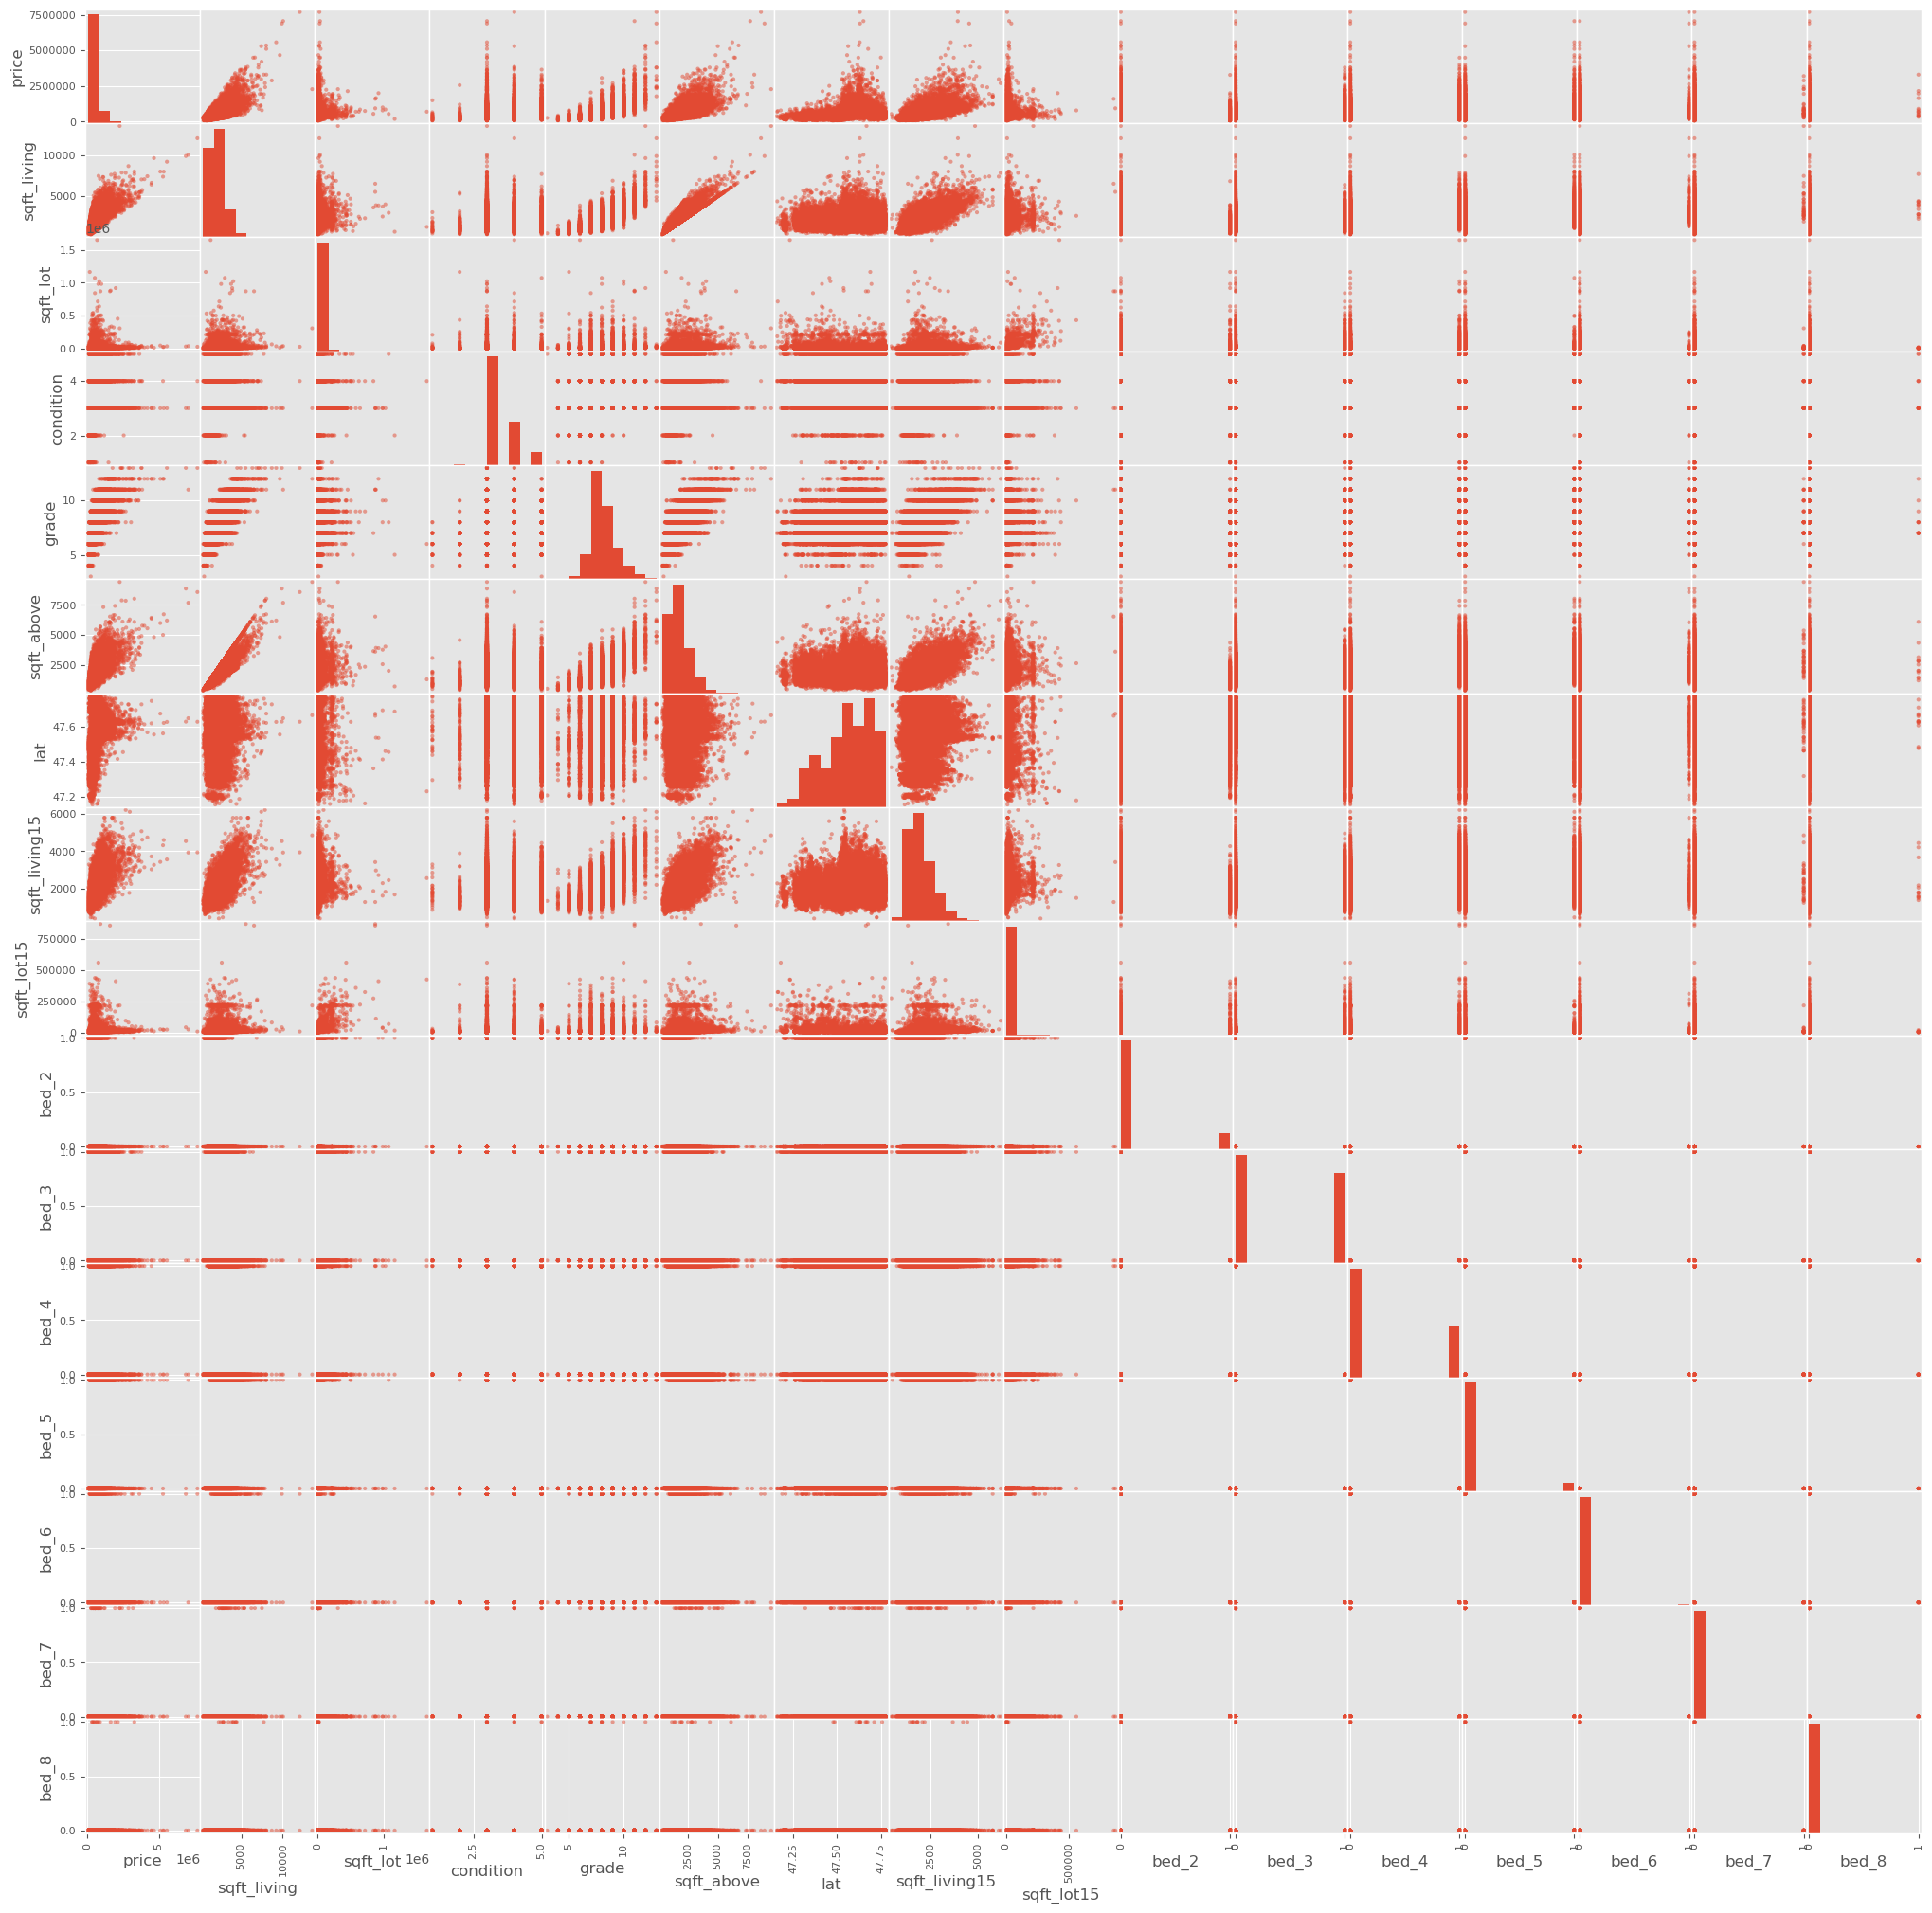

In [49]:
#scatter plot data prediction
pd.plotting.scatter_matrix(data_pred,figsize  = [25, 25]);
plt.show()

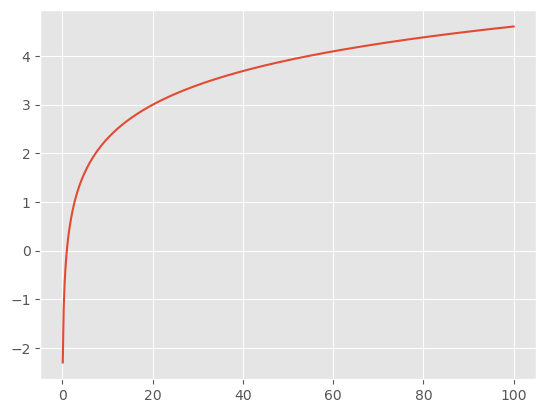

In [50]:
#Natural logarithm
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y);

In [51]:
#importing data 
data= pd.read_csv('/Users/reffer/Desktop/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [55]:
#OLS
outcome = 'price'
x_cols = ['sqft_above', 'sqft_living', 'grade', 'sqft_living15',
          'bathrooms', 'bedrooms', 'sqft_lot', 'yr_built','yr_renovated']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     3179.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:19:11   Log-Likelihood:            -2.4428e+05
No. Observations:               17755   AIC:                         4.886e+05
Df Residuals:                   17745   BIC:                         4.887e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.047e+06   1.47e+05     48.015      0.000    6.76e+06    7.33e+06
sqft_above      -11.9284      4.687     -2.545      0.011     -21.115      -2.741
sqft_living     188.1201      5.106     36.844      0.000     178.112     198.128
grade          1.252e+05   2611.119     47.963      0.000     1.2e+05     1.3e+05
sqft_living15    26.1432      4.123      6.341      0.000      18.062      34.225
bathrooms      6.019e+04   3920.041     15.355      0.000    5.25e+04    6.79e+04
bedrooms      -4.898e+04   2331.995    -21.004      0.000   -5.36e+04   -4.44e+04
sqft_lot         -0.2607      0.042     -6.258      0.000      -0.342      -0.179
yr_built      -3981.5555     76.802    -51.842      0.000   -4132.095   -3831.016
yr_renovated     20.6205      4.504      4.579      0.000      11.793      29.448
==============================================================================
Omnibus:                    14742.631   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1166340.507
Skew:                           3.509   Prob(JB):                         0.00
Kurtosis:                      42.081   Cond. No.                     3.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

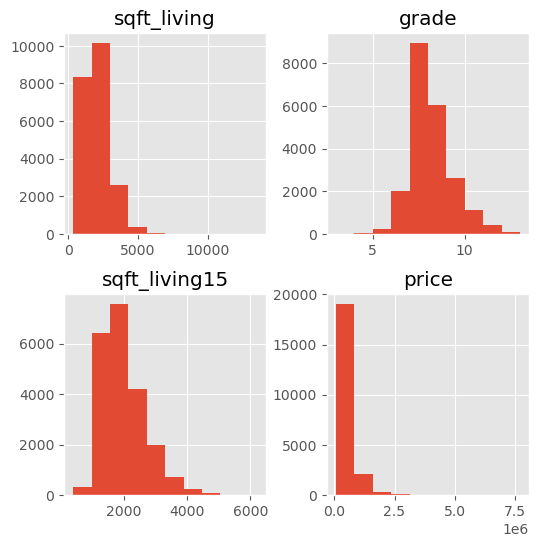

In [73]:
#plot with sqft_living', 'grade', 'sqft_living15', 'price'
data_pred[['sqft_living', 'grade', 'sqft_living15', 'price']].hist(figsize  = [6, 6]);

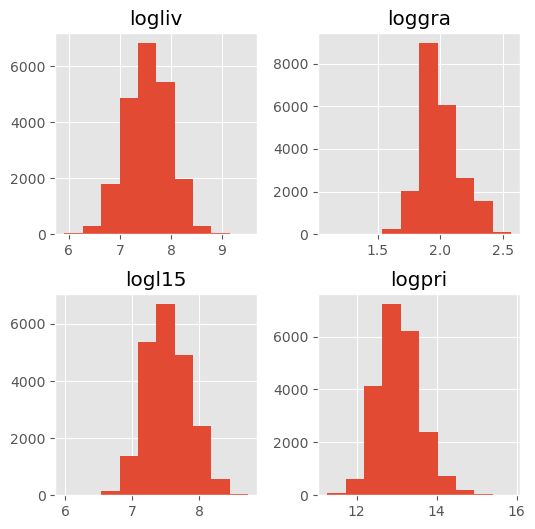

In [74]:
#log function
data_log = pd.DataFrame([])
data_log['logliv'] = np.log(data_pred['sqft_living'])
data_log['loggra'] = np.log(data_pred['grade'])
data_log['logl15'] = np.log(data_pred['sqft_living15'])
data_log['logpri'] = np.log(data_pred['price'])
data_log.hist(figsize  = [6, 6]);

In [84]:
outcome = 'price'
predictor = 'sqft_living'
formula = outcome + '~' + predictor
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:30:26   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
data['logliv'] = np.log(data['sqft_living'])
outcome = 'price'
predictor = 'logliv'
formula = outcome + '~' + predictor
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 1.292e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:30:39   Log-Likelihood:            -3.0233e+05
No. Observations:               21597   AIC:                         6.047e+05
Df Residuals:                   21595   BIC:                         6.047e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.461e+06   3.53e+04    -98.165      0.000   -3.53e+06   -3.39e+06
logliv      5.299e+05   4661.551    113.670      0.000    5.21e+05    5.39e+05
==============================================================================
Omnibus:                    19384.826   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1655521.719
Skew:                           3.977   Prob(JB):                         0.00
Kurtosis:                      45.148   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

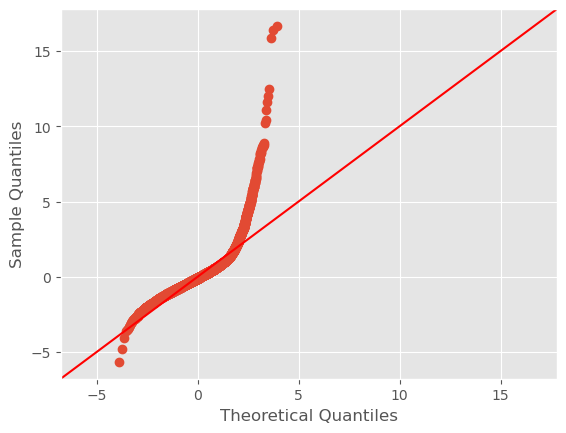

In [77]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [78]:
data['logpri'] = np.log(data['price'])
outcome = 'logpri'
predictor = 'sqft_living'
formula = outcome + '~' + predictor
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logpri   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:25:38   Log-Likelihood:                -9662.2
No. Observations:               21597   AIC:                         1.933e+04
Df Residuals:                   21595   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2188      0.006   1915.383      0.000      12.206      12.231
sqft_living     0.0004   2.81e-06    142.118      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.541   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.562
Skew:                           0.028   Prob(JB):                        0.169
Kurtosis:                       2.973   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

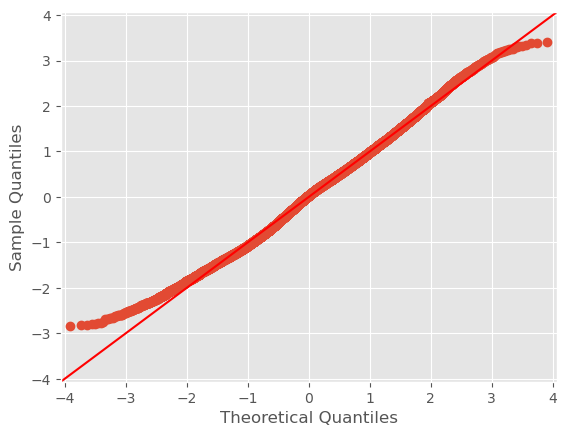

In [81]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [82]:
outcome = 'price'
predictor = 'grade'
formula = outcome + '~' + predictor
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:25:44   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
data['loggra'] = np.log(data['grade'])
outcome = 'price'
predictor = 'loggra'
formula = outcome + '~' + predictor
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                 1.460e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:25:45   Log-Likelihood:            -3.0181e+05
No. Observations:               21597   AIC:                         6.036e+05
Df Residuals:                   21595   BIC:                         6.036e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.623e+06   2.62e+04    -99.929      0.000   -2.67e+06   -2.57e+06
loggra      1.562e+06   1.29e+04    120.843      0.000    1.54e+06    1.59e+06
==============================================================================
Omnibus:                    20431.459   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2172885.845
Skew:                           4.268   Prob(JB):                         0.00
Kurtosis:                      51.392   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

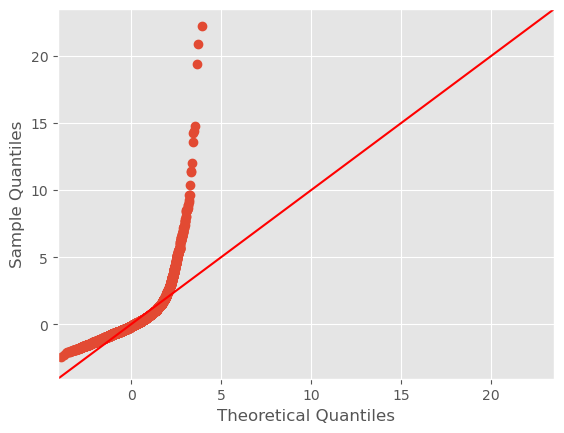

In [65]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [66]:
data['logpri'] = np.log(data['price'])
outcome = 'logpri'
predictor = 'grade'
formula = outcome + '~' + predictor
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logpri   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 2.119e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:19:13   Log-Likelihood:                -9409.7
No. Observations:               21597   AIC:                         1.882e+04
Df Residuals:                   21595   BIC:                         1.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6295      0.017    632.295      0.000      10.597      10.662
grade          0.3158      0.002    145.555      0.000       0.312       0.320
==============================================================================
Omnibus:                      130.298   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.708
Skew:                           0.181   Prob(JB):                     9.24e-30
Kurtosis:                       3.130   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

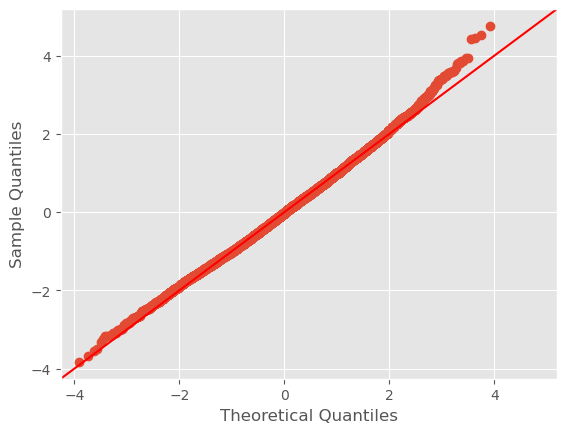

In [67]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

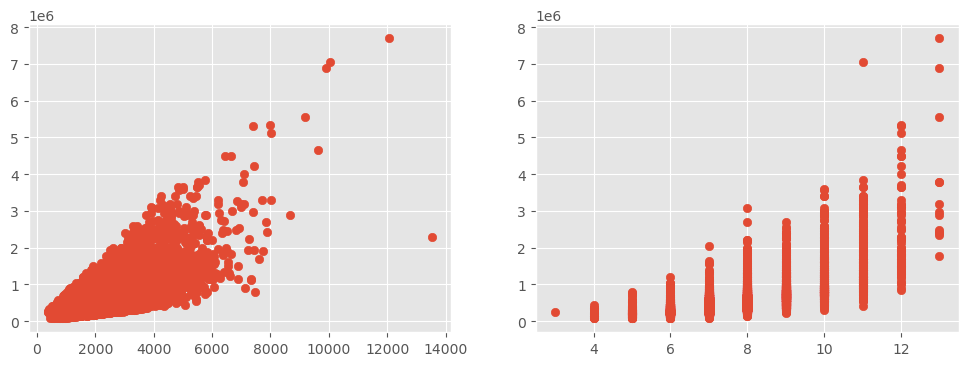

In [86]:
# cheeking for positive correlation between sqft_living, grade and price.
#Load the Dataset
data= pd.read_csv('/Users/reffer/Desktop/kc_house_data.csv')

# indepents and dependet variables
x = data[['sqft_living', 'grade']].values
y = data['price'].values

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].scatter(x[:,0], y)
ax[1].scatter(x[:,1], y)

plt.show()

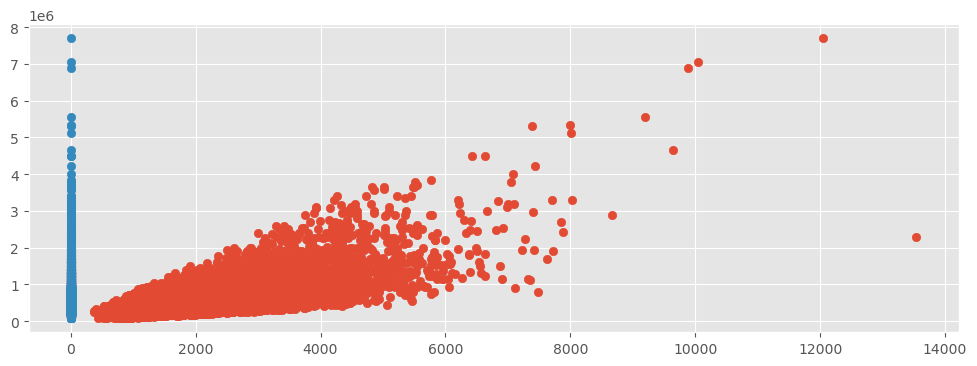

In [87]:
#scatter plot 
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(x[:,0], y)
ax.scatter(x[:,1], y)

(array([1.000e+00, 2.700e+01, 2.420e+02, 2.038e+03, 8.974e+03, 6.065e+03,
        2.615e+03, 1.134e+03, 3.990e+02, 1.020e+02]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 10 artists>)

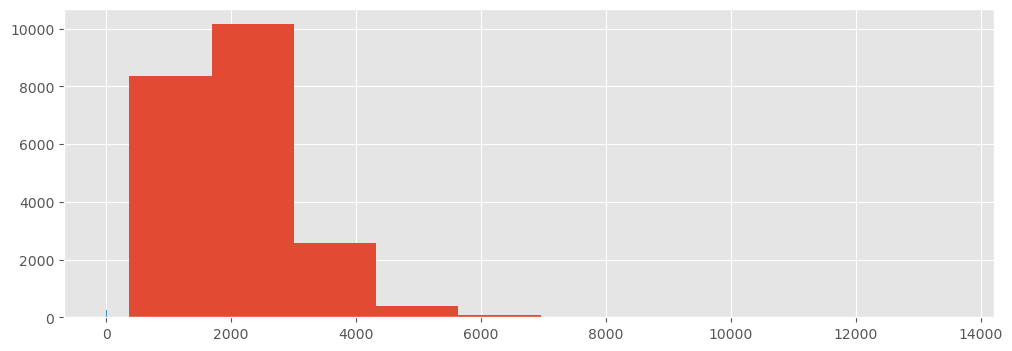

In [88]:
#plot their distributions
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(x[:,0])
ax.hist(x[:,1])

(array([1.000e+00, 2.700e+01, 2.420e+02, 2.038e+03, 8.974e+03, 6.065e+03,
        2.615e+03, 1.134e+03, 3.990e+02, 1.020e+02]),
 array([-3.97035853, -3.11796896, -2.2655794 , -1.41318983, -0.56080027,
         0.2915893 ,  1.14397887,  1.99636843,  2.848758  ,  3.70114756,
         4.55353713]),
 <BarContainer object of 10 artists>)

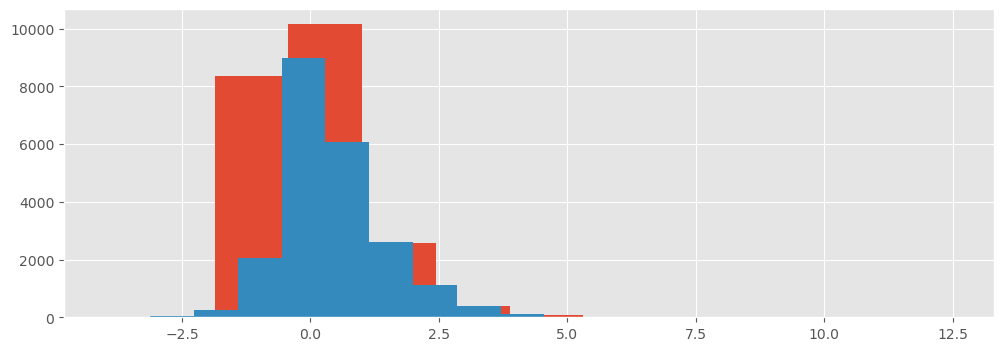

In [89]:
#StandardScaler
#import it and scale the data via its fit_transform() method:
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

ax.hist(x_std[:,0])
ax.hist(x_std[:,1])


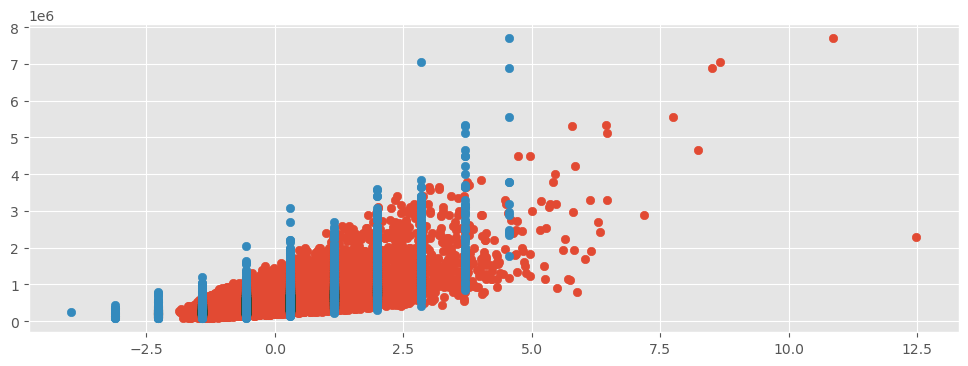

In [90]:
#scatter plot 
fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

ax.scatter(x_std[:,0], y)
ax.scatter(x_std[:,1], y)

(array([  28.,  242.,    0., 2038., 8974., 8680., 1134.,    0.,  399.,
         102.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

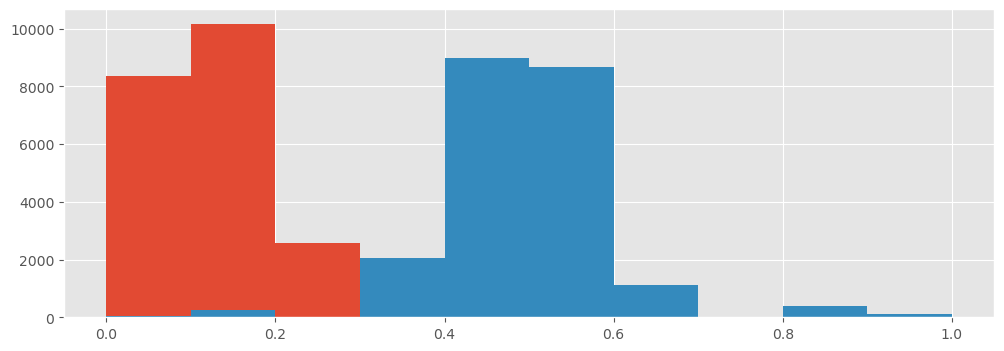

In [92]:
#MinMaxScale
#normalize features, we use the MinMaxScaler class.
from sklearn.preprocessing import MinMaxScaler

fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)

ax.hist(x_minmax [:,0])
ax.hist(x_minmax [:,1])

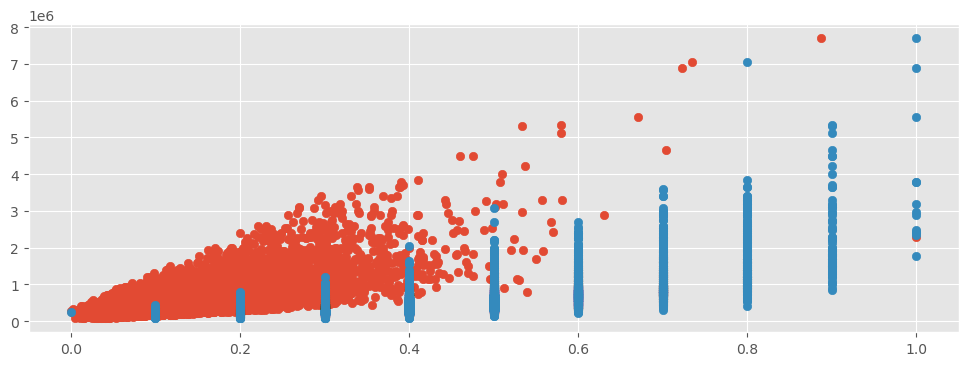

In [93]:
#correlation between sqft_living and grade with price
fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)

ax.scatter(x_minmax [:,0], y)
ax.scatter(x_minmax [:,1], y)

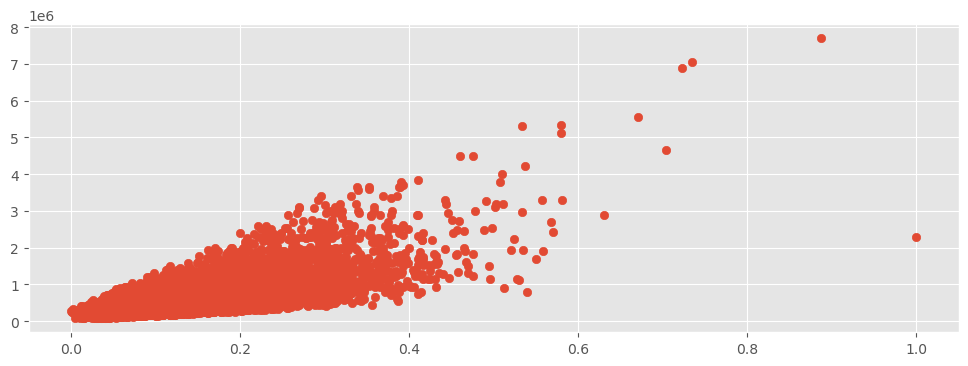

In [94]:
#Effects of Outliers
fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)

ax.scatter(x_minmax [:,0], y)

(array([8.3540e+03, 1.0165e+04, 2.5810e+03, 3.9500e+02, 7.2000e+01,
        2.3000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

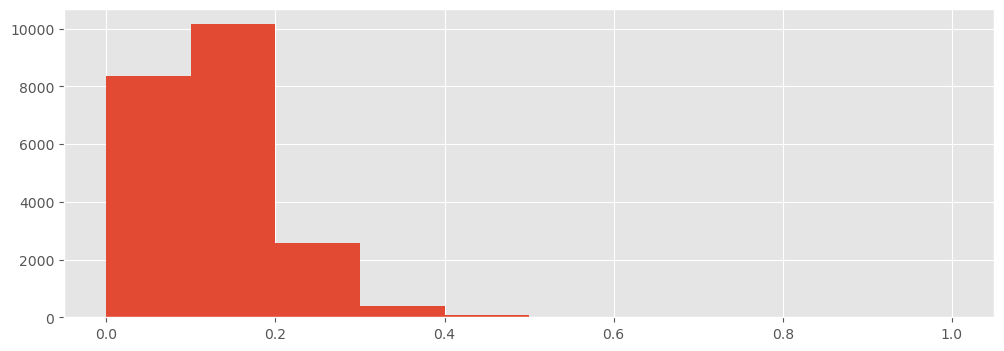

In [95]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)

ax.hist(x_minmax [:,0])

In [127]:
#Feature Scaling Through Scikit-Learn Pipelines
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics


# Import Data
data= pd.read_csv('/Users/reffer/Desktop/kc_house_data.csv')
x = data[['sqft_living']].values
y = data['price'].values

# Split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

# Define the pipeline for scaling and model fitting
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("SGD Regression", SGDRegressor())
])

# Scale the data and fit the model
pipeline.fit(X_train, Y_train)

# Evaluate the model
Y_pred = pipeline.predict(X_test)
print('Mean Absolute Error: ', mean_absolute_error(Y_pred, Y_test))
print('Score', pipeline.score(X_test, Y_test))

Mean Absolute Error:  174311.67110023292
Score 0.4857511433047186
